# Predictive model Fake news tweets
Jupyter Notebook for Fundamentals of Machine learning <br>
Shania Spierings, 1693878


## Introduction to the project

Recently, "Fake news" has become a well-known term. Fake news is defined as false or misleading information masquerading as legitimate news (Allen et al., 2020). The content is fabricated and the sources are unverifiable. These types of fake news often have serious consequences (Allen et al., 2020). A research report from Hindman and Barash (2018) reveals that Twitter consists of a concentrated 'fake news' ecosystem. More than 6.6 million tweets have been linked to fake news and conspiracy news publishers.  

This project is a collaboration with the Research Group Artificial Intelligence of the University of Applied Sciences Utrecht. This assignment aims to distinguish fake news tweets from real news tweets. This notebook builds upon the work of a group of IT students and our team continued to engineer more features and evaluate the different models. During this assignment, the scope is confined to features created based on the text of the tweets.  

## Data pre-processing steps

In [2]:
# The following packages are needed to make the model work. 
import pandas as pd
import sklearn as sk
import json
import re 
import string
import seaborn as sns
import matplotlib.pyplot as plt

# importing the nltk library. These are mostly used in the POS tag feature and the source check feature
import nltk
from nltk import word_tokenize, pos_tag
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.corpus import brown
nltk.download('universal_tagset')
nltk.download('averaged_perceptron_tagger')

from collections import Counter

[nltk_data] Downloading package universal_tagset to
[nltk_data]     /Users/shaniaspierings/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/shaniaspierings/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


### The dataset
The dataset has been provided by the AI-Research group and consists of 225405 entries. Each entry provides the tweet-id, the tweeted text and the label depicting whether it is fake news or not. 

In [3]:
#import the original dataset provided by the AI-research group
df = pd.read_csv("tweets_labeled.csv", engine='python') 
df.head() # this shows the head of the dataframe in the output 

,tweet_id,text,label
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225405 entries, 0 to 225404
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   tweet_id  225405 non-null  int64 
 1   text      225405 non-null  object
 2   label     225405 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 5.2+ MB


## Feature engineering
Machine learning algorithms use input data to create outputs. These input data comprise of features, which are often structured as columns. According to Rençberoğlu (2019), feature engineering is needed to properly prepare the dataset and make the dataset compatible with the algorithm's requirements. For this assignment, each member of our group worked (individually) on specific features that could be accessed by the other members. For this assignment, I worked on the Part-of-speech tagging feature and the source check feature. 

### Applying the features
As mentioned all the students have worked on specific features. These features have been shared in a .csv file created by each team member. In the following steps, the correlations between the features have been checked. 

Some features have been created by multiple team members and have been compared. When the outputs are the same, I looked at the source codes shared through GitHub. When reviewing the source code, the feature consisting of the clearest code has been included. 

#### Dataframe containing features created by Ali

In [5]:
df_ali = pd.read_csv("df_Ali_Labled_Including_feature_DF.csv", engine='python')
df_ali.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225425 entries, 0 to 225424
Data columns (total 78 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   text                             222099 non-null  object 
 1   label                            225425 non-null  int64  
 2   contains_hashtag                 225405 non-null  float64
 3   count_hashtag                    225405 non-null  float64
 4   contains_link                    225405 non-null  float64
 5   count_link                       225405 non-null  float64
 6   contains_mention                 225405 non-null  float64
 7   count_mention                    225405 non-null  float64
 8   is_retweet                       225405 non-null  float64
 9   count_3dots                      225405 non-null  float64
 10  count_capital_letters            225405 non-null  float64
 11  count_capital_letters_to_length  225405 non-null  float64
 12  co

The following columns have been dropped from the dataframe. The included comments indicate the reasoning for dropping this specific column. 

In [6]:
df_ali.drop("text", axis=1, inplace=True) # the final file already contains a 'text'
df_ali.drop("label", axis=1, inplace=True) # the final file already contains a 'label'
df_ali.drop("text_org", axis=1, inplace=True) # the final file already contains a 'text'
df_ali.drop("COUNT_DT", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_NNP", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_VBD", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_NN", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_CC", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_VBN", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_IN", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_JJ", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_VBZ", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_TO", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_VBG", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_RB", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_VB", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_NNS", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_VBP", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_WRB", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_MD", axis=1, inplace=True) # has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_WP", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_PRP", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_NNPS", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_CD", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_WDT", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_PRP$", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_JJR", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_RBR", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_RP", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_EX", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_PDT", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_UH", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_FW", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_JJS", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_RBS", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_POS", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_WP$", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("COUNT_LS", axis=1, inplace=True)# has also been created by me and this one returns a NaN correlation
df_ali.drop("count_mention", axis=1, inplace=True) # has also been created by Sasha and contains the same values
df_ali.drop("count_hashtag", axis=1, inplace=True) # has also been created by Sasha and contains the same values
df_ali.drop("contains_link", axis=1, inplace=True) # has also been created by Freek and contains the same values
df_ali.drop("is_retweet", axis=1, inplace=True) # has also been created by Freek and contains the same values
df_ali.drop("readability", axis=1, inplace=True) # has also been created by Freek and that one returns a higher correlation

In [7]:
df_ali.head()

,contains_hashtag,count_link,contains_mention,count_3dots,count_capital_letters,count_capital_letters_to_length,count_stop_words,count_special_chars,count_digits,count_alphabets,...,is_positive,is_negative,is_neutral,count_positive_freq_words,count_negative_freq_words,count_negative_freq_bigrams,count_positive_freq_bigrams,ac_length,ac_words_count,tweet_id
0,0.0,0.0,1.0,1.0,11.0,0.078014,7.0,28.0,0.0,113.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,117.0,21.0,1.161041e+18
1,0.0,0.0,1.0,1.0,8.0,0.057143,1.0,32.0,0.0,108.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,111.0,17.0,1.176361e+18
2,1.0,1.0,1.0,0.0,16.0,0.213333,0.0,16.0,1.0,58.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,27.0,2.0,1.099037e+18
3,0.0,1.0,1.0,0.0,23.0,0.203540,6.0,27.0,3.0,83.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,66.0,13.0,1.092916e+18
4,0.0,1.0,1.0,1.0,24.0,0.169014,0.0,34.0,9.0,99.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,90.0,16.0,1.149038e+18


#### Dataframe containing features created by Freek
Freek has included features created by me and Sasha before turning in his data file. Therefore, these need to be dropped. 

In [8]:
df_freek = pd.read_csv("df_labeled_including_features_freek.csv", engine='python') 
df_freek.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225365 entries, 0 to 225364
Data columns (total 44 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Unnamed: 0                    225365 non-null  int64  
 1   tweet_id                      225365 non-null  int64  
 2   text                          225365 non-null  object 
 3   label                         225365 non-null  int64  
 4   compound                      225365 non-null  float64
 5   neg                           225365 non-null  float64
 6   neu                           225365 non-null  float64
 7   pos                           225365 non-null  float64
 8   extreme_Vader                 225365 non-null  int64  
 9   sentiment_textblob            225365 non-null  float64
 10  extreme_textblob              225365 non-null  int64  
 11  sentiment_AFINN_SentStrength  225365 non-null  int64  
 12  extreme_AFINN_SentStrength    225365 non-nul

In [9]:
df_freek.drop("Unnamed: 0", axis=1, inplace=True) # An unnamed column 
df_freek.drop("label", axis=1, inplace=True) # the final file already contains a 'label'
df_freek.drop("text", axis=1, inplace=True) # dataframe already contains the text
df_freek.drop(".", axis=1, inplace=True) # This feature has been created by me and is therefore in my dataframe
df_freek.drop("ADJ", axis=1, inplace=True) # This feature has been created by me and is therefore in my dataframe
df_freek.drop("ADP", axis=1, inplace=True) # This feature has been created by me and is therefore in my dataframe
df_freek.drop("ADV", axis=1, inplace=True) # This feature has been created by me and is therefore in my dataframe
df_freek.drop("CONJ", axis=1, inplace=True)# This feature has been created by me and is therefore in my dataframe
df_freek.drop("DET", axis=1, inplace=True) # This feature has been created by me and is therefore in my dataframe
df_freek.drop("NOUN", axis=1, inplace=True)# This feature has been created by me and is therefore in my dataframe
df_freek.drop("NUM", axis=1, inplace=True) # This feature has been created by me and is therefore in my dataframe
df_freek.drop("PRON", axis=1, inplace=True)# This feature has been created by me and is therefore in my dataframe
df_freek.drop("PRT", axis=1, inplace=True) # This feature has been created by me and is therefore in my dataframe
df_freek.drop("VERB", axis=1, inplace=True)# This feature has been created by me and is therefore in my dataframe
df_freek.drop("X", axis=1, inplace=True) # This feature has been created by me and is therefore in my dataframe
df_freek.drop("ref_count", axis=1, inplace=True)# This feature has been created by me and is therefore in my dataframe
df_freek.drop("stopwords", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("mentions", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("char_count", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("hashtags", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("word_count", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("capital_count", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("average_word_length", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("compound", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("neg", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("neu", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("pos", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("sentiment_textblob", axis=1, inplace=True) # This feature has been created by Sasha and is therefore in her dataframe
df_freek.drop("clean_text", axis=1, inplace=True) # Droped to make sure the model runs without a problem

In [10]:
df_freek.head()

,tweet_id,extreme_Vader,extreme_textblob,sentiment_AFINN_SentStrength,extreme_AFINN_SentStrength,sentiment_ANEW,extreme_ANEW,extreme_combined,flesch_grade,longest_word,contains_link,check_for_numbers,amount_of_numbers,percentage_use,RT
0,1161040537207463936,0,0,2,0,0.0,0,0,68.26,10,0,0,0,0,1
1,1176360756239118342,1,0,4,1,0.0,0,2,26.81,11,0,0,0,0,1
2,1099036648573145088,0,0,0,0,0.0,0,0,-52.05,13,1,0,0,0,1
3,1092915693203480577,0,0,0,0,0.0,0,0,54.90,7,1,0,0,0,1
4,1149038450668187654,0,0,-2,0,0.0,0,0,42.72,9,1,1,7,1,1


#### Dataframe containing features created by Mina

In [11]:
df_mina = pd.read_csv("df_MinaDF.csv", engine='python') 
df_mina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225405 entries, 0 to 225404
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Unnamed: 0                225405 non-null  int64  
 1   tweet_id                  225405 non-null  int64  
 2   text                      223316 non-null  object 
 3   target                    225405 non-null  int64  
 4   mention_count             225405 non-null  int64  
 5   char_count                225405 non-null  int64  
 6   words_only_count          225405 non-null  int64  
 7   flesch_readability_grade  225405 non-null  float64
 8   model_output              225405 non-null  float64
dtypes: float64(2), int64(6), object(1)
memory usage: 15.5+ MB


In [12]:
df_mina.drop("Unnamed: 0", axis=1, inplace=True) # contains an unnamed column 
#df_mina.drop("tweet_id", axis=1, inplace=True) # Is already a part of the final dataset
df_mina.drop("text", axis=1, inplace=True) # Is already a part of the final dataset
df_mina.drop("flesch_readability_grade", axis=1, inplace=True) # has also been created by Freek and that one returns a higher correlation
df_mina.drop("mention_count", axis=1, inplace=True) # has also been created by Sasha and that one returns a higher correlation
df_mina.drop("target", axis=1, inplace=True) # Seems linked/ identical to the label column
df_mina.drop("model_output", axis=1, inplace=True) # Result of her model

In [13]:
df_mina.head()

,tweet_id,char_count,words_only_count
0,1161040537207463936,121,14
1,1176360756239118342,115,17
2,1099036648573145088,26,2
3,1092915693203480577,66,7
4,1149038450668187654,88,16


#### Dataframe containing features created by Yuan
The provided file of Yuan contains no tweet_id, thus merging the datafiles, later on, will result in problems. Therefore, it is desired to append the tweet_id to Yuan's dataset. As the index of the entries is the same as the original dataset the set can be merged on this.

In addition, Yuan's file consists of a large portion of a POS-tag that contained zero's and returned a NaN. So I only selected the features that are relevant for my prediction. 

In [14]:
df_yuan_orig = pd.read_csv("features_yuan.csv", engine='python') 
original_df = pd.read_csv("tweets_labeled.csv", engine='python') 
original_df = original_df[["tweet_id"]] # this shows the head of the dataframe in the output 
df_yuan = pd.merge(original_df, df_yuan_orig, left_index=True, right_index=True)

In [15]:
df_yuan = df_yuan[["tweet_id", "Yuan_Feature_1", "Yuan_Feature_2"]] # The following features have been selected because these don't return a NaN correlation
df_yuan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225405 entries, 0 to 225404
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   tweet_id        225405 non-null  int64  
 1   Yuan_Feature_1  225405 non-null  float64
 2   Yuan_Feature_2  225405 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 5.2 MB


In [16]:
df_yuan.head()

,tweet_id,Yuan_Feature_1,Yuan_Feature_2
0,1161040537207463936,1.000000e+00,1.000000e+00
1,1176360756239118342,1.000000e+00,1.000000e+00
2,1099036648573145088,1.364385e-07,2.925688e-04
3,1092915693203480577,7.986062e-04,8.133333e-01
4,1149038450668187654,6.179312e-14,7.841145e-31


#### Dataframe containing features created by Sasha

In [17]:
df_sasha = pd.read_csv("df_sashaDF.csv", engine='python') 
df_sasha.drop("Unnamed: 0", axis=1, inplace=True) # unnamed column 
df_sasha.drop("label", axis=1, inplace=True) # unnamed column 
df_sasha.drop("text", axis=1, inplace=True) # Is already present in the final dataframe
df_sasha.drop("char_count", axis=1, inplace=True) # Has also been created by Mina and that one returns a higher correlation
df_sasha.head()

,tweet_id,word_count,avg_word,stopwords,count_words_upper,hashtags,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score
0,1161040537207463936,23.0,5.173913,7.0,1.0,0.0,1.0,0.00,0.4215,0.0,0.882,0.118
1,1176360756239118342,22.0,5.950000,1.0,1.0,0.0,1.0,0.25,0.6369,0.0,0.766,0.234
2,1099036648573145088,6.0,14.000000,0.0,1.0,2.0,1.0,0.00,0.0000,0.0,1.000,0.000
3,1092915693203480577,16.0,6.125000,4.0,3.0,0.0,1.0,0.00,0.0000,0.0,1.000,0.000
4,1149038450668187654,20.0,6.150000,0.0,1.0,0.0,1.0,0.00,0.2732,0.0,0.900,0.100


In [18]:
df_sasha.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225425 entries, 0 to 225424
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   tweet_id              225425 non-null  int64  
 1   word_count            225405 non-null  float64
 2   avg_word              225405 non-null  float64
 3   stopwords             225405 non-null  float64
 4   count_words_upper     225405 non-null  float64
 5   hashtags              225405 non-null  float64
 6   mentions              225405 non-null  float64
 7   sentiment             225405 non-null  float64
 8   VADER_compound_score  225405 non-null  float64
 9   VADER_neg_score       225405 non-null  float64
 10  VADER_neu_score       225385 non-null  float64
 11  VADER_pos_score       225385 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 20.6 MB


### Part-of-speech tagging
Research from Kapusta and Obonya (2020) and research carried out by Kapusta, Hájek, Munk and Benko (2020) show a correlation between fake news and morphological types. Both pieces of research show a correlation between morphological tags and predicting fake and real news. These tags are created during a morphological analysis. 

The above-mentioned research indicates the potential for part-of-speech tagging in predicting fake news. This feature has started with research into multiple libraries that assist in the part-of-speech tagging. The corpus libraries: Treebank,  Spacy, Brown and nlpnet have been consulted and attempted. Afterwards, the corpus library Brown has been applied for the POS-tagging feature.  

#### Feature proces
First, to assign each word a tag, the word first needs to be tokenized and receives a tag. After the present tags have been collected, the existing tags are counted for that specific entry. The possible tags have been collected through the brown corpus library. The pos_to_possible_tags function compares the collected tags to the possible tags. The not available tags return a 0 for that specific tag to the entire. Each word has been assigned a morphological tag. These tags have been counted for each tweet resulting in a count of all the tags present in the dataset.

In [19]:
# The library brown corpus consists of multiple tags that are used for the part of speech taggging. 
# This function collects the different tags that are included in the library.
def library_tags():
    brown_news_tagged = brown.tagged_words(categories='news', tagset='universal')
    tag_fd = nltk.FreqDist(tag for (word, tag) in brown_news_tagged)
    return tag_fd

# This function tokenizes the text and provides each token with a POS tag. 
def token_tag(x):
    tokens = nltk.word_tokenize(x)
    tags = nltk.pos_tag(tokens, tagset="universal") # tags contains of a list per row 
    return tags

# This function will be used to collects all the possible tags. 
# Compare the possible tags to the mentioned tags in token_tag. 
# If the possbile tag is not mentioned a '0' is added to the tag. 
def pos_to_possible_tags(counter, keys_to_add):
    for k in keys_to_add:
        counter[k] = counter.get(k, 0)
    return counter

# For the following function to work you need to work with a clean text.
# The function for cleaning the text has been created by 
# This function combines the above mentioned functions and provides a number along with a POS-tag.
def pos_numbers():
    tokens = df.loc[:, "text"].apply(token_tag)
    pos_counts = tokens.apply(lambda x: Counter(tag for word,  tag in x))
    pos_counts = pos_counts.apply(lambda x: pos_to_possible_tags(x, library_tags())) # Sources: (alvas, 2017; Rungta, 2020 ; halfer, 2019) 
    df["pos_numbers"] = pos_counts.apply(lambda x: [count for tag, count in sorted(x.most_common())]) # Sources: (alvas, 2017; Rungta, 2020 ; halfer, 2019)
    
    pos_df = pd.DataFrame(df['pos_numbers'].tolist())
    pos_df.columns = sorted(library_tags())
    return pos_df


The loading time for applying this feature took up +/- 3 days in Visual Studio Code. Therefore, I decided to export the results of the feature to a .csv file, to simplify working with the feature in the notebooks. The results of the part of speech tagging feature are merged with the existing dataframe. 

In [20]:
df_pos = pd.read_csv("Pos.csv", engine='python') 
df_pos.drop("Unnamed: 0", axis=1, inplace=True)
df_pos.head(10)

,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRON,PRT,VERB,X
0,3,1,2,0,1,4,11,0,0,1,4,0
1,6,3,1,3,0,1,9,0,0,1,2,0
2,5,1,0,0,0,0,5,0,0,1,0,0
3,5,1,2,1,0,2,9,0,2,1,2,0
4,4,3,3,0,0,0,13,2,0,2,1,0
5,5,3,2,0,0,0,6,0,0,2,3,0
6,2,3,2,0,1,2,9,0,0,1,3,0
7,2,5,4,0,1,4,7,0,1,2,6,0
8,2,1,0,0,0,0,10,0,0,3,2,0
9,3,1,1,1,1,1,6,0,1,0,4,0


The NLTK documentation uses the following abbreviations for the POS tags (Bird et al., 2019).

. = punctuation marks |
ADJ = Adjective |
ADP = Adposition |
ADV = Adverb |
CONJ = Conjunction |
DET = Determiner |
NOUN = NOUN |
NUM = Numeral |
PRT = Particle |
PRON = Pronoun |
VERB = Verb |
X = other |

In [21]:
df_shania = pd.merge(df, df_pos, left_index=True, right_index=True)
df_shania.head(15)

,tweet_id,text,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRON,PRT,VERB,X
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1,3,1,2,0,1,4,11,0,0,1,4,0
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1,6,3,1,3,0,1,9,0,0,1,2,0
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0,5,1,0,0,0,0,5,0,0,1,0,0
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0,5,1,2,1,0,2,9,0,2,1,2,0
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0,4,3,3,0,0,0,13,2,0,2,1,0
5,1175456815674343424,'RT @kcResister: Warren: 'Congress is complici...,1,5,3,2,0,0,0,6,0,0,2,3,0
6,1180809117310623744,'RT @ShimonPro: A dozen current and former sta...,1,2,3,2,0,1,2,9,0,0,1,3,0
7,1179840318935576578,'RT @samstein: This is a bombshell that isn’t ...,1,2,5,4,0,1,4,7,0,1,2,6,0
8,1081722778125062144,'Planned Parenthood Erects Billboards Urging W...,0,2,1,0,0,0,0,10,0,0,3,2,0
9,1158761795739217921,'https://t.co/MvrznF1fWVWhoever obstructing th...,1,3,1,1,1,1,1,6,0,1,0,4,0


In [22]:
df_shania.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225405 entries, 0 to 225404
Data columns (total 15 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   tweet_id  225405 non-null  int64 
 1   text      225405 non-null  object
 2   label     225405 non-null  int64 
 3   .         225405 non-null  int64 
 4   ADJ       225405 non-null  int64 
 5   ADP       225405 non-null  int64 
 6   ADV       225405 non-null  int64 
 7   CONJ      225405 non-null  int64 
 8   DET       225405 non-null  int64 
 9   NOUN      225405 non-null  int64 
 10  NUM       225405 non-null  int64 
 11  PRON      225405 non-null  int64 
 12  PRT       225405 non-null  int64 
 13  VERB      225405 non-null  int64 
 14  X         225405 non-null  int64 
dtypes: int64(14), object(1)
memory usage: 25.8+ MB


#### Correlation of the POS-tagging feature
The heatmap and correlation matrix show the correlations between the features and the label. Some of the POS tags that return a higher correlation are: 
* VERB -> 0.471
* DET -> 0.346

In addition, the violin plot has been applied. This plot shows among others: 
* The punctuation (.) shows a higher 'roof' for real tweets, compared to fake tweets. 
* A larger amount of real tweets contains no Adverb (ADV). The same can be said for the Determiner (DET).
* The Noun (NOUN) and Verb (VERB) count are a bit higher in comparison to some other tags. 
* It seems like the fake news tweets show a more centred distribution of the Noun (NOUN) count. 
* The difference in the usage of Verb's (VERB) is interesting as the count in the real tweets results in a pyramid-like shape. Whereas, for the fake news tweets the plot shows a more diamond-like shape. 

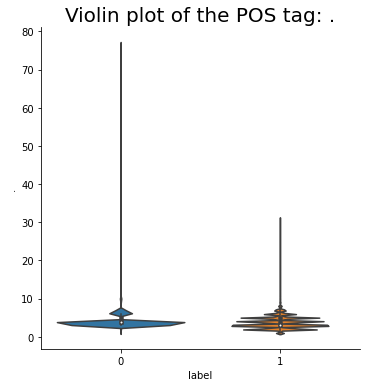

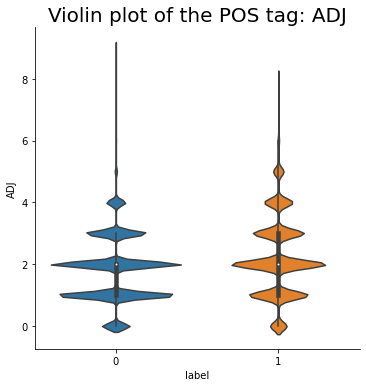

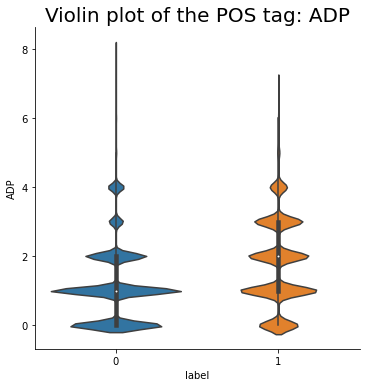

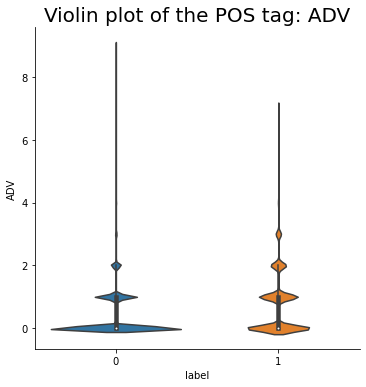

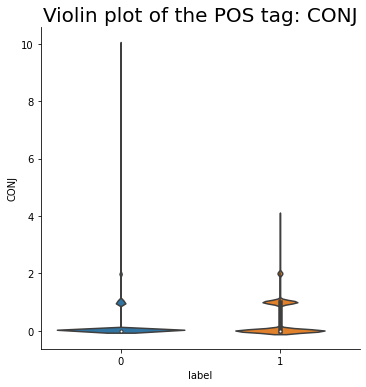

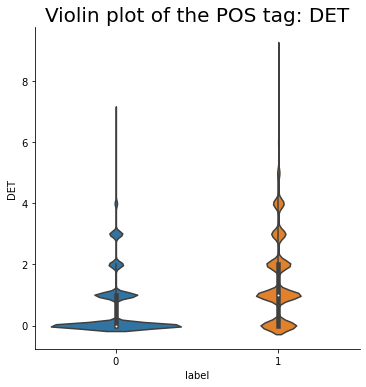

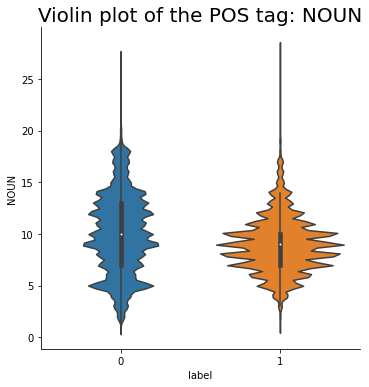

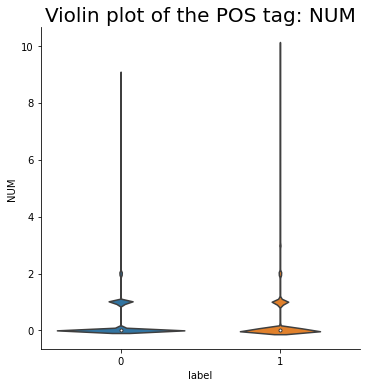

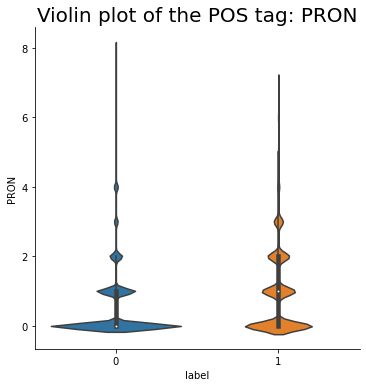

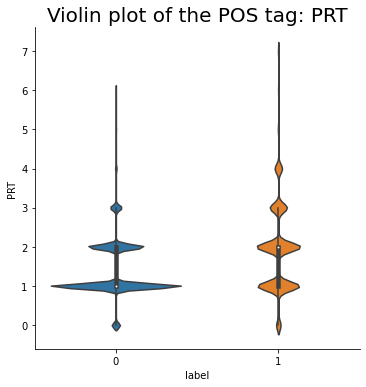

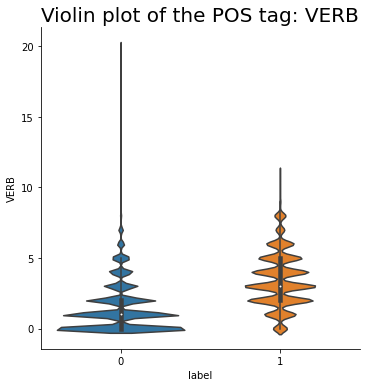

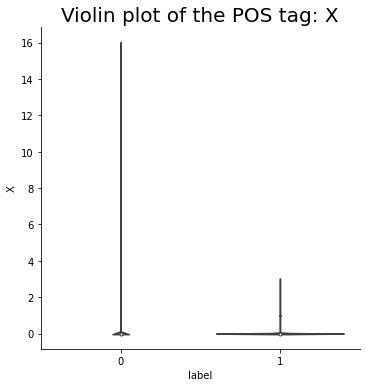

In [23]:
df_pos_tags = df_shania[["label",".", "ADJ", "ADP", "ADV", "CONJ", "DET", "NOUN", "NUM", "PRON", "PRT", "VERB", "X"]]

for column in df_pos_tags: 
    if column != "label":
        sns.catplot(x="label", y=column, kind= "violin", data=df_pos_tags)
        plt.title('Violin plot of the POS tag: ' + column, fontsize = 20) # title with fontsize 20
        plt.show()

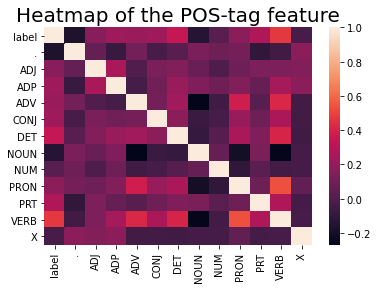

,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRON,PRT,VERB,X
label,1.000000,-0.165707,0.164900,0.232522,0.218621,0.232942,0.346298,-0.140113,0.028256,0.180597,0.281565,0.470691,-0.026546
.,-0.165707,1.000000,0.063798,-0.075545,0.107488,-0.028953,0.025263,0.127218,0.085765,0.113110,-0.102424,-0.046148,0.173779
ADJ,0.164900,0.063798,1.000000,0.270371,-0.000287,0.123930,0.151629,0.074604,-0.005606,0.093955,0.137625,0.136280,0.152064
ADP,0.232522,-0.075545,0.270371,1.000000,-0.032305,0.099082,0.214153,0.142319,0.088506,0.149852,0.065242,0.254948,0.175988
ADV,0.218621,0.107488,-0.000287,-0.032305,1.000000,0.109145,0.240742,-0.267399,-0.050798,0.384319,0.024784,0.422362,-0.042723
CONJ,0.232942,-0.028953,0.123930,0.099082,0.109145,1.000000,0.179176,-0.070243,-0.031116,0.217598,0.088624,0.267922,-0.044534
DET,0.346298,0.025263,0.151629,0.214153,0.240742,0.179176,1.000000,-0.089005,0.018704,0.269507,0.139652,0.406254,-0.051840
NOUN,-0.140113,0.127218,0.074604,0.142319,-0.267399,-0.070243,-0.089005,1.000000,0.066969,-0.201534,0.128972,-0.253070,-0.035279
NUM,0.028256,0.085765,-0.005606,0.088506,-0.050798,-0.031116,0.018704,0.066969,1.000000,-0.103079,0.032077,-0.041842,-0.038369
PRON,0.180597,0.113110,0.093955,0.149852,0.384319,0.217598,0.269507,-0.201534,-0.103079,1.000000,0.084154,0.536359,0.051364


In [24]:
corr_pos = df_pos_tags.corr() #I'm leaving out the corrected variables (divided by 1 million)
sns.heatmap(corr_pos, xticklabels=corr_pos.columns, yticklabels=corr_pos.columns) #the last two arguments set the column names
plt.title('Heatmap of the POS-tag feature', fontsize = 20) # title with fontsize 20
plt.show()
corr_pos

### Source check feature
Johnston (2004) states that we can indicate our attitude to the sources we cite by choosing specific verbs to refer to them. The English language provides a multitude of verbs that can be applied to refer to a source. The Glasgow Caledonian University (z.d.) provides a multitude of ways to refer to sources. One of the possibilities 'paraphrasing' makes use of specific verbs to introduce the ideas of an author. <br>

To create this feature a list of reference words has been created using web-scraping. This list of reference verbs is based on multiple sources. The following educational institute sources are used to create the list of reference verbs. 

#### Webscraping the reference verbs
To create the list containing the reference verbs, web-scraping is applied. The following steps for web-scraping have been applied for three sources, resulting in the final list. The results from the web-scraping have been placed in a .json file to simplify the process of running the code. 

In [25]:
# For webscraping the following libraries are needed
import json 
import requests
from bs4 import BeautifulSoup 

reference_list = []

# The URL we are going to scrape
url1 = "https://www.port.ac.uk/student-life/help-and-advice/study-skills/research-reading-referencing-and-citation/verbs-for-citations"
url2 = "https://cisl.edu/academic-english-vocabulary-verbs-citations/"
url3 = "https://advice.writing.utoronto.ca/english-language/referring-to-sources/"

# Collect the first URL
#get the page
page1 = requests.get(url1)
soup1 = BeautifulSoup(page1.content, "html.parser")

#Get the table and the content block. The content block has been determined by using the inspect function in the browser. 
table = soup1.find(class_="Table")
for i in table.findAll("li"):
    i = i.get_text()
    
    if i not in reference_list: 
        reference_list.append(i)
        reference_list.sort()
   
# Collect the second URL
#get the page
page2 = requests.get(url2)
soup2 = BeautifulSoup(page2.content, "html.parser")

#Get the table and the content block. The content block has been determined by using the inspect function in the browser. 
block2 = soup2.find(class_="cmsmasters_post_content entry-content")
for i in block2.findAll("h2"):
    i = i.get_text()
    i = i.lower()
    if i not in reference_list: 
        reference_list.append(i)
        reference_list.sort()

# Collect the third URL
#get the page
page3 = requests.get(url3)
soup3 = BeautifulSoup(page3.content, "html.parser")

#Get the table and the content block. The content block has been determined by using the inspect function in the browser. 
table3 = soup3.find(class_="entry-content")
for i in table3.findAll("td"):
    i = i.get_text() 
    if i not in reference_list: 
        reference_list.append(i)
        reference_list.sort()

print(reference_list)
print("The reference list contains " + str(len(reference_list)) + " words") 

## the list is converted to a json file 
# with open('reference_verbs.json', 'w') as outfile:
    #json.dump(data, outfile)

['accept', 'acknowledge', 'admit', 'advocate', 'affirm', 'agree', 'allege', 'analyse', 'applaud', 'appraise', 'argue', 'assert', 'assess', 'assume', 'believe', 'blame', 'calculate', 'censure', 'characterize', 'claim', 'clarify', 'class', 'classify', 'comment', 'conclude', 'consider', 'contend', 'criticize', 'decide', 'define', 'demonstrate', 'deny', 'depict', 'describe', 'determine', 'discern', 'disclose', 'discover', 'discuss', 'disparage', 'divulge', 'doubt', 'emphasise', 'emphasize', 'establish', 'evaluate', 'examine', 'explain', 'fault', 'find', 'hypothesize', 'identify', 'imply', 'indicate', 'infer', 'interpret', 'investigate', 'maintain', 'note', 'notice', 'object', 'observe', 'point out', 'portray', 'praise', 'present', 'propose', 'prove', 'query', 'question', 'reason', 'recommend', 'refer', 'reject', 'remark', 'report', 'reveal', 'ridicule', 'say', 'see', 'show', 'single out', 'speculate', 'state', 'stipulate', 'stress', 'study', 'suggest', 'suspect', 'thank', 'think', 'view', 

#### Source check feature
After the webscraping the source check feature has been applied on the reference list. To enhance the results of the source check the text needs to be lemmatized. Afterwards, it will only contain the root of the word without conjugation. This is an important step as the reference list only contains words without their conjugation. 

To perform the lemmatizer words first need to receive a POS-tag. Because a tag group is already sufficient, four tag groups have been selected. After which the text is lemmatized based on the tag. In the add_ref_count each lemmatized word is checked to see if there are any matches with the reference list.

In [26]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()

# This function collects the possible part of speech tags that are needed for the lemmatization. 
def get_POS_tags(word): 
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV,}
    return tag_dict.get(tag, wordnet.NOUN)

# To enhance the results of the counting function the text needs to be lemmatized.
def lemmatize_text(text):  
    return [lemmatizer.lemmatize(w, get_POS_tags(w)) for w in nltk.word_tokenize(text)]

# This code returns the number similarities between the df["text"] and the reference list. 
# To determine if the text indicates if a reference has been used. This feature only works for paraphrased references.  
def add_ref_count(input_df):   
    text = input_df["text"]
    lem_text = text.apply(lemmatize_text)
    ref_list = [] 
    
    for line in lem_text:
        this_count = 0
        for ref_word in line: 
            if ref_word in reference_list :
                this_count += 1  
        ref_list.append(this_count)    
  
    return ref_list

Due to the longer waiting time, this feature has been run through visual code and exported into a json file. In the next part the file will be loaded in and added to the dataframe. 

In [27]:
with open('ref_df.json') as json_file:
    ref_list = json.load(json_file)

df_shania.loc[:,"ref_count"] = ref_list

In [28]:
df_shania.head(10)

,tweet_id,text,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRON,PRT,VERB,X,ref_count
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1,3,1,2,0,1,4,11,0,0,1,4,0,0
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1,6,3,1,3,0,1,9,0,0,1,2,0,2
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0,5,1,0,0,0,0,5,0,0,1,0,0,0
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0,5,1,2,1,0,2,9,0,2,1,2,0,0
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0,4,3,3,0,0,0,13,2,0,2,1,0,0
5,1175456815674343424,'RT @kcResister: Warren: 'Congress is complici...,1,5,3,2,0,0,0,6,0,0,2,3,0,0
6,1180809117310623744,'RT @ShimonPro: A dozen current and former sta...,1,2,3,2,0,1,2,9,0,0,1,3,0,2
7,1179840318935576578,'RT @samstein: This is a bombshell that isn’t ...,1,2,5,4,0,1,4,7,0,1,2,6,0,1
8,1081722778125062144,'Planned Parenthood Erects Billboards Urging W...,0,2,1,0,0,0,0,10,0,0,3,2,0,1
9,1158761795739217921,'https://t.co/MvrznF1fWVWhoever obstructing th...,1,3,1,1,1,1,1,6,0,1,0,4,0,0


#### Correlation of the source check feature
The heatmap and correlation matrix show the correlations between the features and the label. The source check feature returns a correlation of 0.159. The violin plot shows that the higher reference counts are more apparent in the fake news tweets. 

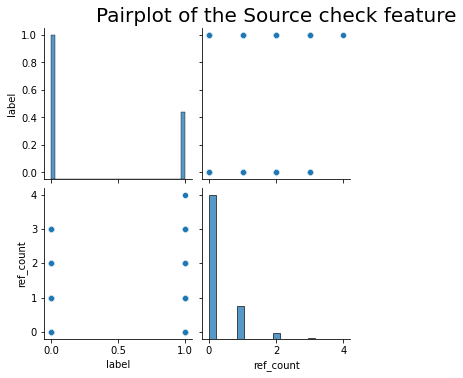

In [29]:
df_source_subset = df_shania[["label", "ref_count"]]
sns.pairplot(df_source_subset)
plt.title('Pairplot of the Source check feature', fontsize = 20) # title with fontsize 20
plt.show()

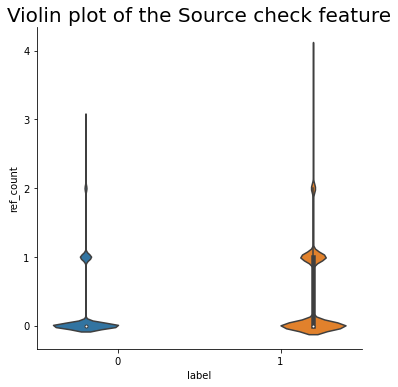

In [30]:
sns.catplot(x="label", y="ref_count", hue="label", kind= "violin", data=df_source_subset)
plt.title('Violin plot of the Source check feature', fontsize = 20) # title with fontsize 20
plt.show()

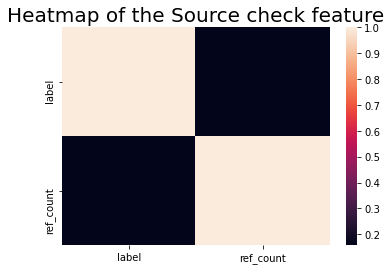

,label,ref_count
label,1.000000,0.158592
ref_count,0.158592,1.000000


In [31]:
corr_source = df_source_subset.corr() #I'm leaving out the corrected variables (divided by 1 million)
sns.heatmap(corr_source, xticklabels=corr_source.columns, yticklabels=corr_source.columns) #the last two arguments set the column names
plt.title('Heatmap of the Source check feature', fontsize = 20) # title with fontsize 20
plt.show()
corr_source

### Selection of variables
As mentioned before, each team member has created specific features. At the beginning of this notebook, the CSV files containing all the features of all the students have been shared. Some features have been created by multiple team members. All the features have been compared and the features consisting of the highest correlation has been selected. The other similar features have been dropped. When the output and correlation were the same, I looked at the source codes shared through GitHub. When reviewing the source code, the feature consisting of the clearest code has been included.
<br>
*GitHub-link:* https://github.com/HU-AI-Research 

#### Merging the features created by my team members with the features created by myself

As the datafiles each consist of a different number of entries, the dataframes can not be merged in the index. To make sure each column contains the correct values for that specific tweet, the features are merged on tweet_id. 

Due to the extensive entry of the dataset, the risk at overfitting is small. As a result, a multitude of features/ columns can be included in the final dataframe that will be used during the model building. 

In [32]:
df_team_features = df_freek.merge(df_sasha, on='tweet_id')
df_team_features = df_team_features.merge(df_mina, on='tweet_id')
df_team_features = df_team_features.merge(df_yuan, on='tweet_id')

In [33]:
df_team_features.head()

,tweet_id,extreme_Vader,extreme_textblob,sentiment_AFINN_SentStrength,extreme_AFINN_SentStrength,sentiment_ANEW,extreme_ANEW,extreme_combined,flesch_grade,longest_word,...,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score,char_count,words_only_count,Yuan_Feature_1,Yuan_Feature_2
0,1161040537207463936,0,0,2,0,0.0,0,0,68.26,10,...,1.0,0.00,0.4215,0.0,0.882,0.118,121,14,1.000000e+00,1.000000e+00
1,1176360756239118342,1,0,4,1,0.0,0,2,26.81,11,...,1.0,0.25,0.6369,0.0,0.766,0.234,115,17,1.000000e+00,1.000000e+00
2,1099036648573145088,0,0,0,0,0.0,0,0,-52.05,13,...,1.0,0.00,0.0000,0.0,1.000,0.000,26,2,1.364385e-07,2.925688e-04
3,1092915693203480577,0,0,0,0,0.0,0,0,54.90,7,...,1.0,0.00,0.0000,0.0,1.000,0.000,66,7,7.986062e-04,8.133333e-01
4,1149038450668187654,0,0,-2,0,0.0,0,0,42.72,9,...,1.0,0.00,0.2732,0.0,0.900,0.100,88,16,6.179312e-14,7.841145e-31


In [34]:
df_final = df_shania.merge(df_team_features, on='tweet_id')
df_final.head()

,tweet_id,text,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,...,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score,char_count,words_only_count,Yuan_Feature_1,Yuan_Feature_2
0,1161040537207463936,'RT @SenJeffMerkley: The Endangered Species Ac...,1,3,1,2,0,1,4,11,...,1.0,0.00,0.4215,0.0,0.882,0.118,121,14,1.000000e+00,1.000000e+00
1,1176360756239118342,'RT @LindseyGrahamSC: Interesting concept -- i...,1,6,3,1,3,0,1,9,...,1.0,0.25,0.6369,0.0,0.766,0.234,115,17,1.000000e+00,1.000000e+00
2,1099036648573145088,'RT @RealJamesWoods: #BuildTheWall #DeportThem...,0,5,1,0,0,0,0,5,...,1.0,0.00,0.0000,0.0,1.000,0.000,26,2,1.364385e-07,2.925688e-04
3,1092915693203480577,'RT @PatriotJackiB: Why would the MEXICAN GOV’...,0,5,1,2,1,0,2,9,...,1.0,0.00,0.0000,0.0,1.000,0.000,66,7,7.986062e-04,8.133333e-01
4,1149038450668187654,'RT @TheOnion: Sweden Announces Plan To Get 10...,0,4,3,3,0,0,0,13,...,1.0,0.00,0.2732,0.0,0.900,0.100,88,16,6.179312e-14,7.841145e-31


#### Heatmap of the included variables

The heatmap and correlation matrix show the correlations between the features and the label. Some features that return a higher correlation are: 
* Yuan Feature 1 -> 0.873
* Yuan Feature 2 -> 0.798
* Contains link -> -0.681
* Stopwords -> 0.521
* VERB -> 0.471
* Character count -> 0.466
* Word count -> 0.396
* DET -> 0.346

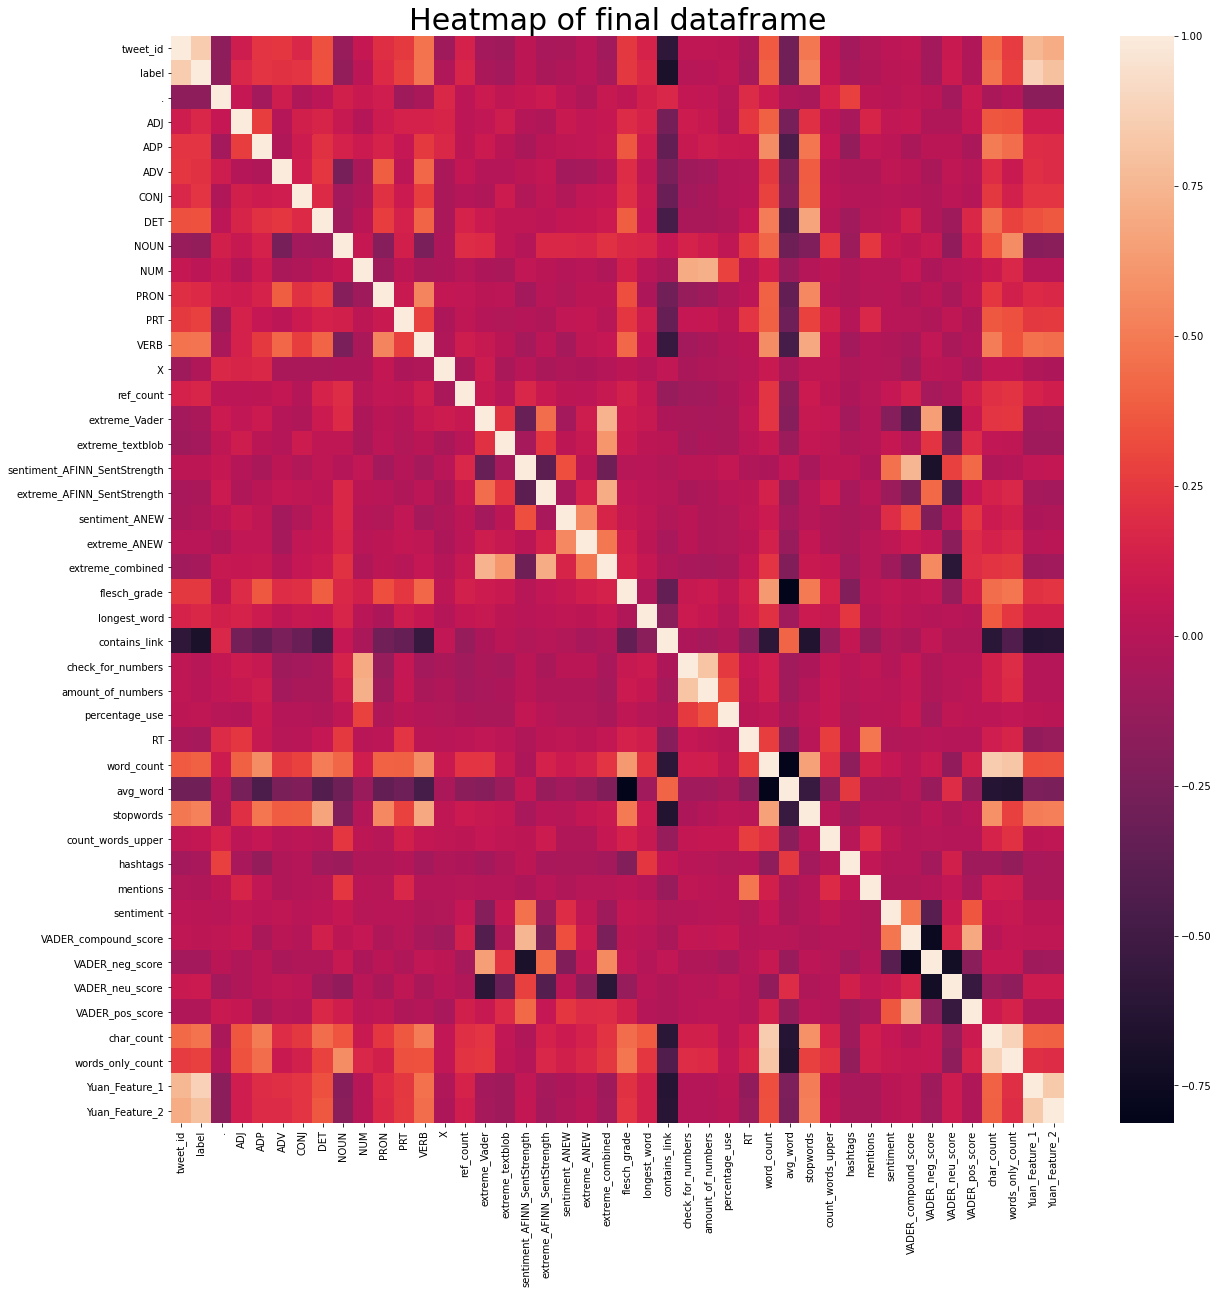

,tweet_id,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,...,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score,char_count,words_only_count,Yuan_Feature_1,Yuan_Feature_2
tweet_id,1.000000,0.847390,-0.163028,0.103081,0.234063,0.239160,0.169344,0.339408,-0.119842,0.066969,...,-0.015120,0.023435,0.040523,-0.076315,0.079650,-0.020959,0.433093,0.262254,0.754666,0.708037
label,0.847390,1.000000,-0.165666,0.164994,0.232653,0.218686,0.232998,0.346407,-0.140138,0.028247,...,-0.022321,0.016798,0.032837,-0.081514,0.089952,-0.029315,0.465647,0.277593,0.873240,0.798350
.,-0.163028,-0.165666,1.000000,0.063756,-0.075598,0.107459,-0.028941,0.025248,0.127272,0.085766,...,0.033250,0.014850,0.037639,0.020974,-0.074757,0.080792,-0.050650,-0.004010,-0.182253,-0.168710
ADJ,0.103081,0.164994,0.063756,1.000000,0.270369,-0.000309,0.123938,0.151611,0.074635,-0.005633,...,0.150631,0.050153,0.067772,-0.023089,-0.029865,0.070351,0.359194,0.346072,0.113757,0.112346
ADP,0.234063,0.232653,-0.075598,0.270369,1.000000,-0.032331,0.099084,0.214156,0.142333,0.088521,...,0.049255,0.027017,-0.053340,0.018619,0.015812,-0.044954,0.497983,0.440653,0.198951,0.191529
ADV,0.239160,0.218686,0.107459,-0.000309,-0.032331,1.000000,0.109138,0.240792,-0.267403,-0.050798,...,-0.032232,0.043562,0.022220,-0.053222,0.041280,0.005734,0.199512,0.081331,0.213013,0.188968
CONJ,0.169344,0.232998,-0.028941,0.123938,0.099084,0.109138,1.000000,0.179159,-0.070243,-0.031151,...,0.000701,0.013236,-0.002576,-0.023302,0.027269,-0.010427,0.247693,0.131695,0.233716,0.228649
DET,0.339408,0.346407,0.025248,0.151611,0.214156,0.240792,0.179159,1.000000,-0.089014,0.018706,...,0.002417,0.029328,0.128439,-0.031857,-0.097645,0.177349,0.442536,0.288122,0.337813,0.366979
NOUN,-0.119842,-0.140138,0.127272,0.074635,0.142333,-0.267403,-0.070243,-0.089014,1.000000,0.066993,...,0.237804,0.070361,0.031069,0.078663,-0.150561,0.118873,0.355024,0.568143,-0.192700,-0.183448
NUM,0.066969,0.028247,0.085766,-0.005633,0.088521,-0.050798,-0.031151,0.018706,0.066993,1.000000,...,0.012348,0.005478,0.061275,-0.034174,0.011860,0.024276,0.083148,0.169353,0.003711,0.001793


In [35]:
corr_final = df_final.corr() #I'm leaving out the corrected variables (divided by 1 million)
fig, ax = plt.subplots(figsize=(20,20)) # Sample figsize in inches
sns.heatmap(corr_final, xticklabels=corr_final.columns, yticklabels=corr_final.columns, ax=ax)
plt.title('Heatmap of final dataframe', fontsize = 30) # title with fontsize 20
plt.show()
corr_final

## K-nearest neighbor algorithm
Prediction models like Random Forest, Decision Tree and kNN all serve different purposes (Jain, 2015). K-nearest neighbor (KNN) is an algorithm based on supervised learning (Jain, 2015). Supervised machine learning depends on labelled input data to learn from. KNN can be used for both classification and regression predictions but is more often used for clustering and classification (Zhang, 2016). 

KNN determines neighborhoods, so there must be a distance metric. This implies that all the features must be numeric. Distance metrics may be affected by varying scales between attributes and also high-dimensional space. The attributes may be numeric or nominal (Jain, 2015). The algorithm selects the nearest neighbors based on the neighbor input, in this case, 5. For each input, it selects the data points that are most similar to the input. The training time can differ for each model (Sharma, 2020). 

According to Jain (2015) KNN is best used to determine similar examples. According to literature, this model kNN should fit the aim of this research, as it is focused on predicting similar examples. 

## Build the model


In [36]:
from sklearn.neighbors import KNeighborsClassifier #the object class we need
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split #We need this to split the data

### Dividing the dataset 
The dataset for the model needs to be split in a training and test set. The first portion for the training set needs to include about 70-80% of the data. The second set - test set - includes about 20-30% of the data. The test data set is used only to test the data, not to calculate the coefficients/ train the data. 

In [37]:
X = df_final.loc[:,'.':'Yuan_Feature_2'] #create the X matrix with the selected variables
y = df_final["label"] #create the y-variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) #split the data, store it into different variables

In [38]:
X_train.head() #show the head of the training set

,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRON,PRT,...,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score,char_count,words_only_count,Yuan_Feature_1,Yuan_Feature_2
54708,1,4,1,0,0,0,8,0,1,3,...,1.0,0.000000,0.0000,0.000,1.000,0.000,121,13,9.998156e-01,3.191722e-01
217368,5,2,2,0,0,0,7,2,0,1,...,1.0,0.000000,0.0000,0.000,1.000,0.000,60,8,3.740019e-01,3.191722e-01
136921,7,2,3,3,0,1,8,0,3,3,...,1.0,0.780000,0.3612,0.000,0.894,0.106,114,12,1.000000e+00,9.999734e-01
41831,6,4,4,0,0,0,9,0,1,1,...,1.0,-0.033333,-0.4981,0.152,0.848,0.000,95,12,8.821292e-18,4.664071e-48
161694,6,2,1,0,0,1,10,1,0,1,...,1.0,-0.031818,0.0000,0.000,1.000,0.000,71,11,1.756595e-02,6.540131e-04


### Evaluate the model

In [39]:
knn = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 5 neighbors
knn = knn.fit(X_train, y_train) #this fits the k-nearest neigbor model with the train data

In [40]:
knn.score(X_test, y_test) #calculate the fit on the *test* data

0.9633929892027806

In [41]:
df["label"].value_counts()

0    153462
1     71943
Name: label, dtype: int64

96% of the tweets is predicted accurately. 

The original dataset consists of 153.462 'real news tweets' and of 71943 'fake news tweets'. When predicting everything as real the accuracy would be: <br>
$accuracy = \frac{153.462}{225.405} = .68$

Predicting everything as fake will give an accuracy of: <br>
$accuracy = \frac{71.943}{225.405} = .32$

The prediction of KNN is about 28% higher compared to guessing a tweet is always 'real news'.

### Confusion Matrix
A confusion matrix gives a the different classes and the number of predictions for each combination.

In [42]:
from sklearn.metrics import confusion_matrix
y_test_pred = knn.predict(X_test) #the predicted values
cm = confusion_matrix(y_test, y_test_pred) #creates a "confusion matrix"
conf_matrix = pd.DataFrame(cm, index=['News (actual)', 'Fake news (actual)'], columns = ['News (predicted)', 'Fake news (predicted)']) #make a dataframe, put labels on rows (index) and columns 
conf_matrix

,News (predicted),Fake news (predicted)
News (actual),44593,1319
Fake news (actual),1156,20542


The confusion matrix returns that of the fake news tweets, 20542 are correctly predicted as 'fake news', 1156 are predicted as 'real news'. And 1319 news tweets are predicted as fake news. Based on these results the following accuracy, recall and precision can be calculated:

$accuracy = \frac{44.593 + 20.542}{44.593 + 20.542 + 1156 + 1319} = \frac{65.135}{67.610} = .96$

$recall = \frac{20.542}{20.542 + 1319} = \frac{20.542}{21.861} = .94$

$precision = \frac{20.542}{20.542 + 1156} =\frac{20.542}{21.698} = .95$

The score might improve by trying out different neighbour values.

#### Calculate the precision, accuracy and recall
As discussed during the lecture it can be beneficial to test-out different parameters for the model. To achieve this efficiently the built-in function classification_report from sklearn can be consulted to quickly calculate the accuracy, precision and recall for different neighbor values. 

In [43]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new = knn_new.fit(X_train, y_train) #fit new model on train data
    y_test_pred_new = knn_new.predict(X_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_test, y_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     45912
           1       0.95      0.95      0.95     21698

    accuracy                           0.97     67610
   macro avg       0.96      0.96      0.96     67610
weighted avg       0.97      0.97      0.97     67610

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     45912
           1       0.97      0.92      0.94     21698

    accuracy                           0.97     67610
   macro avg       0.97      0.95      0.96     67610
weighted avg       0.97      0.97      0.97     67610

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     45912
           1       0.94      0.95      0.95     21698

    accuracy                           0.97     67610
   macro avg       0.96      0.9

The scores seem broadly similar, but around 3 neighbors seem to give the best result. 

## Project Limitations
During this project, we come across a few limitations. First, the features have been created by different team members. The approach of each member towards data cleaning can vary a bit. As a result, the results from features can differ based on the way they are cleaned. This has become apparent when reviewing the data files provided by the other students. The feature returning the highest correlation has been included in the dataset. However, this does not guarantee it is the most suitable feature. 

Second, the original dataframe consists of both original tweets and retweets. This provides two problems: there is a change the same tweet ends up in both the train and test set. As a result, the test set will be contaminated. Another problem arises on feature importance. When the trainingset has multiple tweets containing the same text, some features are given bigger importance over other features. Therefore, harming the prediction capabilities. 

The next part examines the results of the kNN prediction model, when retweets are excluded. 

### Remove retweets

In [44]:
df_final_wh_retweet = df_final[df_final.RT == False] 
df_final_wh_retweet = df_final_wh_retweet.drop("RT", 1)
df_final_wh_retweet["label"].value_counts()

0    15381
1    10357
Name: label, dtype: int64

In [45]:
df_final_wh_retweet.head()

,tweet_id,text,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,...,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score,char_count,words_only_count,Yuan_Feature_1,Yuan_Feature_2
8,1081722778125062144,'Planned Parenthood Erects Billboards Urging W...,0,2,1,0,0,0,0,10,...,1.0,0.0,0.0000,0.000,1.000,0.0,84,10,1.480421e-03,2.542350e-03
9,1158761795739217921,'https://t.co/MvrznF1fWVWhoever obstructing th...,1,3,1,1,1,1,1,6,...,0.0,0.0,-0.6808,0.318,0.682,0.0,87,8,5.957524e-01,9.986283e-01
11,1095142095621365760,'CAIR Backs Ilhan Omar's 'Legitimate Criticism...,0,1,3,2,0,0,0,9,...,1.0,0.0,-0.4767,0.291,0.709,0.0,83,10,2.668043e-13,7.063089e-13
14,1137856356818595841,'@nopasa @cathmckenna https://t.co/ldEruis5Js',0,2,1,0,0,0,0,4,...,1.0,0.0,0.0000,0.000,1.000,0.0,18,2,3.191722e-01,3.191722e-01
16,1090272871958695936,'Not suprised! ! https://t.co/PHc6lTQ0wl',0,4,0,0,0,0,0,3,...,0.0,0.0,0.0000,0.000,1.000,0.0,12,2,3.191722e-01,3.191722e-01


#### Correlations
The heatmap and correlation matrix show the correlations between the features and the label. Some features that used to return a higher correlation before the retweets were droped are: 

* Yuan Feature 1 -> before 0.873 after 0.635
* Yuan Feature 2 -> before 0.798 after 0.455
* Contains link -> before -0.681 after 0.016
* Stopwords -> before 0.521 after 0.145
* VERB -> before 0.471 after 0.217
* Character count -> before 0.466 after 0.429
* Word count -> before 0.396 after 0.340
* DET -> before 0.346 after 0.010

Features that presented a high correlation score in this correlation matrix are: words count only -> 0.420 and longest word -> 0.319. These gave a lower correlation when the dataset still contained the retweets

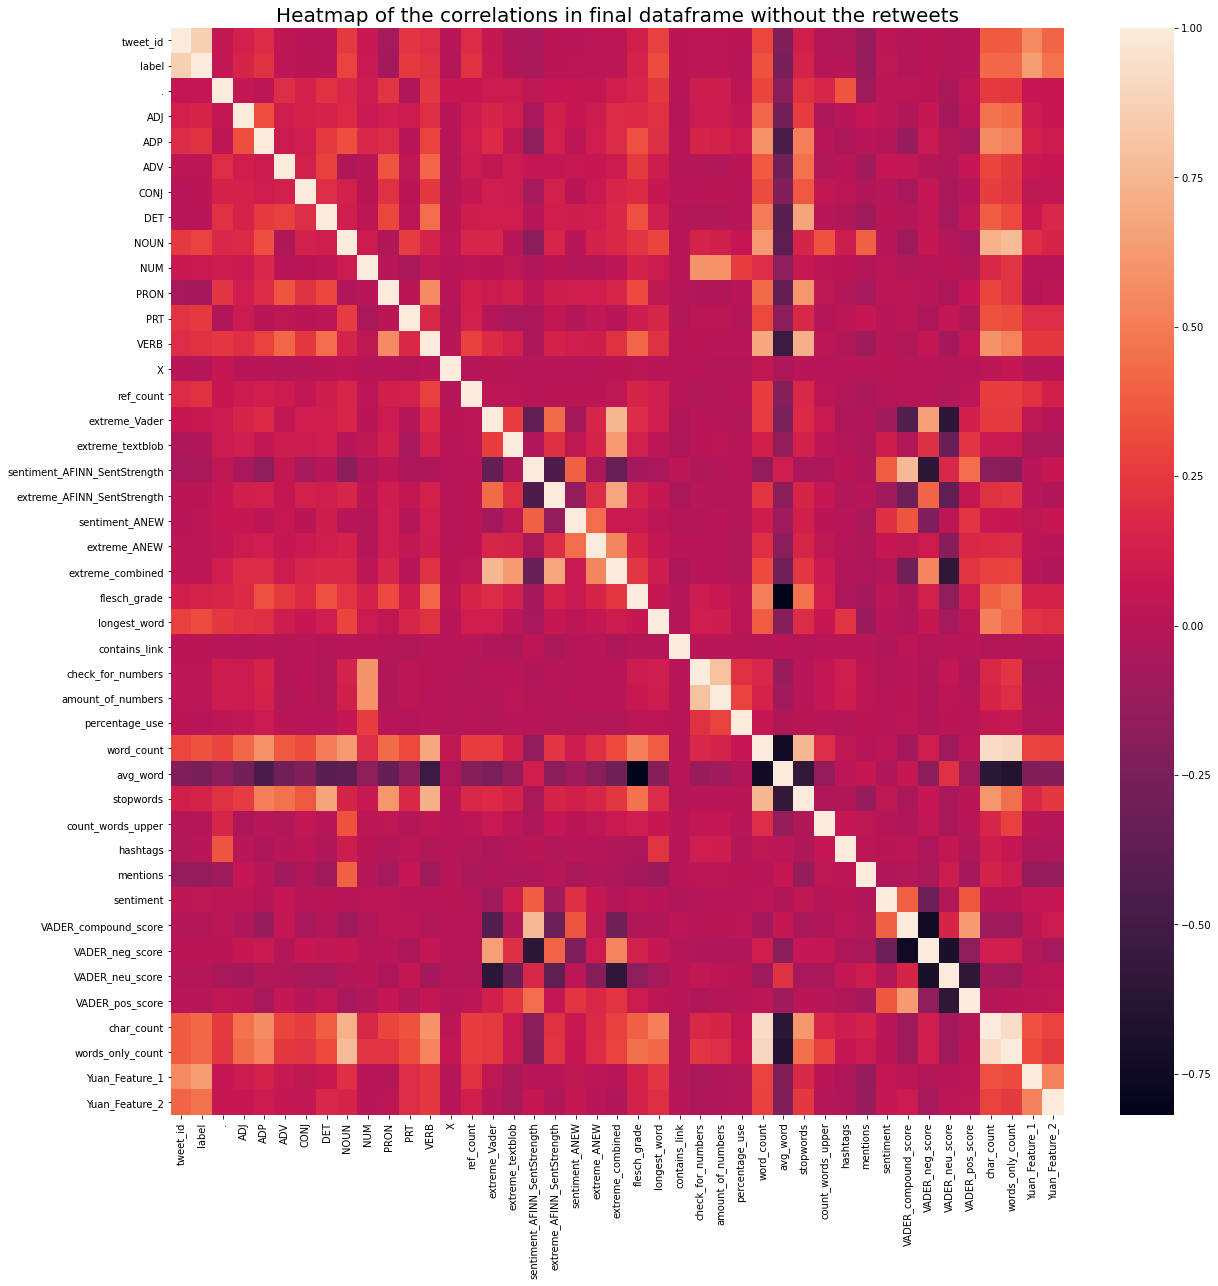

,tweet_id,label,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,...,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score,char_count,words_only_count,Yuan_Feature_1,Yuan_Feature_2
tweet_id,1.000000,0.858524,0.049300,0.131818,0.183616,0.032196,0.010235,0.009300,0.249243,0.071988,...,-0.130775,0.027235,-0.011062,0.015689,-0.012125,-0.000853,0.372300,0.370432,0.556303,0.404906
label,0.858524,1.000000,0.054379,0.148885,0.212769,0.024539,0.017959,0.009788,0.288332,0.082889,...,-0.140412,0.038871,-0.010295,0.016418,-0.012252,-0.001487,0.428658,0.419690,0.634789,0.454778
.,0.049300,0.054379,1.000000,0.053587,0.029328,0.196350,0.138555,0.212214,0.163405,0.095969,...,-0.095623,0.031512,0.023703,0.015881,-0.045693,0.044830,0.248519,0.239177,0.057460,0.062669
ADJ,0.131818,0.148885,0.053587,1.000000,0.326365,0.112904,0.133771,0.144748,0.177536,0.083180,...,0.057264,0.028559,-0.037394,0.065523,-0.076832,0.032304,0.452879,0.437766,0.092327,0.060326
ADP,0.183616,0.212769,0.029328,0.326365,1.000000,0.086542,0.106271,0.248621,0.329428,0.167974,...,0.011623,-0.005674,-0.128772,0.082020,-0.017935,-0.066572,0.560920,0.523879,0.138865,0.096950
ADV,0.032196,0.024539,0.196350,0.112904,0.086542,1.000000,0.131395,0.270057,-0.027365,0.010931,...,-0.087512,0.061021,0.052572,-0.013602,-0.033693,0.061176,0.292709,0.240317,0.071020,0.059132
CONJ,0.010235,0.017959,0.138555,0.133771,0.106271,0.131395,1.000000,0.191963,0.132569,0.018019,...,-0.024119,0.001732,-0.061872,0.067658,-0.057841,0.003959,0.264976,0.227677,0.034859,0.043111
DET,0.009300,0.009788,0.212214,0.144748,0.248621,0.270057,0.191963,1.000000,0.112185,0.029702,...,-0.095512,0.016759,-0.006125,0.045214,-0.071027,0.046930,0.388048,0.306258,0.071870,0.166225
NOUN,0.249243,0.288332,0.163405,0.177536,0.329428,-0.027365,0.132569,0.112185,1.000000,0.088216,...,0.389254,0.000080,-0.106295,0.068823,-0.012655,-0.059112,0.724890,0.772610,0.201384,0.152791
NUM,0.071988,0.082889,0.095969,0.083180,0.167974,0.010931,0.018019,0.029702,0.088216,1.000000,...,-0.010232,0.019407,-0.021038,0.001230,0.016012,-0.023238,0.169790,0.226718,0.011852,0.006169


In [47]:
corr_final_wh_retweet = df_final_wh_retweet.corr() #I'm leaving out the corrected variables (divided by 1 million)
fig, ax = plt.subplots(figsize=(20,20)) # Sample figsize in inches
sns.heatmap(corr_final_wh_retweet, xticklabels=corr_final_wh_retweet.columns, yticklabels=corr_final_wh_retweet.columns, ax=ax)
plt.title('Heatmap of the correlations in final dataframe without the retweets', fontsize = 20) # title with fontsize 20
plt.show()
corr_final_wh_retweet

#### Split the dataset again & create the model
The same steps as before have been applied to split the dataset and train the model. 

In [48]:
X_2 = df_final_wh_retweet.loc[:,'.':'Yuan_Feature_2'] #create the X matrix with the selected variables
y_2 = df_final_wh_retweet["label"] #create the y-variable

X_2_train, X_2_test, y_2_train, y_2_test = train_test_split(X_2, y_2, test_size=0.3, random_state=1) #split the data, store it into different variables

X_2_train.head() #show the head of the training set

,.,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRON,PRT,...,mentions,sentiment,VADER_compound_score,VADER_neg_score,VADER_neu_score,VADER_pos_score,char_count,words_only_count,Yuan_Feature_1,Yuan_Feature_2
152096,5,1,1,0,0,0,14,0,0,0,...,0.0,-0.038095,-0.8658,0.492,0.508,0.000,93,11,0.000350,0.000990
118505,2,0,0,1,0,0,2,0,0,1,...,0.0,0.000000,0.0000,0.000,1.000,0.000,22,3,0.009326,0.319172
68453,3,1,2,0,0,1,5,0,0,1,...,0.0,0.000000,0.0000,0.000,1.000,0.000,36,5,0.219656,0.059951
13269,4,1,0,1,0,1,8,0,0,4,...,0.0,0.100000,0.4404,0.000,0.828,0.172,93,11,1.000000,1.000000
108451,2,0,0,0,0,0,4,0,0,1,...,0.0,0.000000,0.0000,0.000,1.000,0.000,14,1,0.319172,0.319172


In [49]:
knn_2 = KNeighborsClassifier(n_neighbors=5) #create a KNN-classifier with 3 neighbors
knn_2 = knn_2.fit(X_2_train, y_2_train) #this fits the k-nearest neigbor model with the train data
knn_2.score(X_2_test, y_2_test) #calculate the fit on the *test* data

0.7861952861952862

79% of the tweets is predicted accurately. 

The original dataset consists of 15.381 'real news tweets' and of 10.357 'fake news tweets'. When predicting everything as real the accuracy would be: <br>
$accuracy = \frac{15.383}{25.740} = .59$

Predicting everything as fake will give an accuracy of: <br>
$accuracy = \frac{10.357}{25.740} = .40$

The prediction of KNN is about 20% higher compared to guessing a tweet is always 'real news'. 

#### Confusion matrix

In [50]:
from sklearn.metrics import confusion_matrix
y_2_test_pred = knn_2.predict(X_2_test) #the predicted values
cm_2 = confusion_matrix(y_2_test, y_2_test_pred) #creates a "confusion matrix"
conf_matrix_2 = pd.DataFrame(cm_2, index=['News (actual)', 'Fake news (actual)'], columns = ['News (predicted)', 'Fake news (predicted)']) #make a dataframe, put labels on rows (index) and columns 
conf_matrix_2

,News (predicted),Fake news (predicted)
News (actual),3633,950
Fake news (actual),701,2438


The confusion matrix returns that of the fake news tweets, 2438 are correctly predicted as 'fake news', 701 are predicted as 'real news'. And 950 news tweets are predicted as fake news. Based on these results the following accuracy, recall and precision can be calculated:

$accuracy = \frac{3633 + 2438}{3622 + 2438 + 701 + 950} = \frac{6071}{7722} = .78$

$recall = \frac{2438}{2438 + 950} = \frac{2438}{3388} = .72$

$precision = \frac{2438}{2438 + 701} =\frac{2438}{3139} = .78$

The score might improve by trying out different neighbour values.

### Calculate the precision, accuracy and recall of the dataframe without retweets
As discussed during the lecture it can be beneficial to test-out different parameters for the model. To achieve this efficiently the built-in function classification_report from sklearn can be consulted to quickly calculate the accuracy, precision and recall for different neighbor values. 

In [51]:
from sklearn.metrics import classification_report

for i in range(1,11):
    knn_new_2 = KNeighborsClassifier(n_neighbors = i) #make a new kNN model with i (1-10) neighbors
    knn_new_2 = knn_new_2.fit(X_2_train, y_2_train) #fit new model on train data
    y_2_test_pred_new = knn_new_2.predict(X_2_test) #predict using new model, with test data
    print(f"With {i} neighbors the result is:")
    print(classification_report(y_2_test, y_2_test_pred_new)) #use a built-in function to print out accuracy, precision and recall

With 1 neighbors the result is:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      4583
           1       0.71      0.77      0.74      3139

    accuracy                           0.78      7722
   macro avg       0.77      0.78      0.77      7722
weighted avg       0.78      0.78      0.78      7722

With 2 neighbors the result is:
              precision    recall  f1-score   support

           0       0.78      0.89      0.83      4583
           1       0.80      0.64      0.71      3139

    accuracy                           0.79      7722
   macro avg       0.79      0.76      0.77      7722
weighted avg       0.79      0.79      0.78      7722

With 3 neighbors the result is:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82      4583
           1       0.72      0.77      0.74      3139

    accuracy                           0.79      7722
   macro avg       0.78      0.7

The scores seem broadly similar on the accuracy, however the recall and precision score show differences for each neighbor. The highest precision can be achieved with either 5, 7 or 9 neighbors, whereas the highest recall is achieved with two neighbors. Based on the above-presented report 3, 4, 6 and 8 neighbors result in similar scores. I would pick either 3 or 4 neighbors, 3 neighbors deliver a higher precision, whereas 4 neighbors result in a higher recall.

## Conclusion and discussion
During this project, we worked together in a team. Each member focused on specific features. As a group, we engineered features that are within scope created based on the text. Features that have been created are sentence based, word-based, sentiment analysis, word embedding, part of speech, punction and bigram/word frequency.

### High correlation of tweet_id
One of the columns that present a high correlation to the label is the tweet_id. Due to the high correlation, I conducted some research in to the Twitter ID number. The Twitter documentation mentions the following about how the ID is created: 

<br>*At the very beginning of the platform, these IDs were small enough numbers that they could be generated sequentially. Over time, to accommodate growth, the IDs moved from being 32-bit, to 64-bit. Today, Twitter IDs are unique 64-bit unsigned integers, which are based on time, instead of being sequential. The full ID is composed of a timestamp, a worker number, and a sequence number (Twitter, z.d.).* 

<br>
As twitter mentioned the id's are created based on time, number and a sequence number. Therefore, the ID's might correlate on a hidden level. It would be interesting to see if any further features can be created based on the ID

### Comparison of the models
When combining the resulting variables we individually build models using different algorithms. Mina used Neural Networks which has an accuracy of 98%. Yuan combined Naive Bayes and Support Vector Machine which resulted in an accuracy of 94%. Freek applied Random Forest which has an accuracy of 98%. Ali used Logestic Regression which has an accuracy of 94%. Sasha also applied K-nearest Neighbors which resulted in an accuracy of 96%. 

When comparing these results you can see that the accuracy of our models are very close to each other. These accuracies are obtained from the models with the retweets included. As mentioned in the limitations the accuracy is lower, when the retweets are removed. 

Our collective work can serve as a base for future fake news detection projects. Our features can be used for building a more sufficient and detailed detecting system.

# References

Allen, J., Howland, B., Mobius, M., Rothschild, D., & Watts, D. J. (2020). Evaluating the fake news problem at the scale of the information ecosystem. Science Advances, 6(14), eaay3539. https://doi.org/10.1126/sciadv.aay3539

alvas. (2017, 20 mei). Create sentence (row) to POS tags counts (column) matrix from a dataframe [Forum Post]. Stack Overflow. https://stackoverflow.com/questions/44088038/create-sentence-row-to-pos-tags-counts-column-matrix-from-a-dataframe

Bird, S., Klein, E., & Loper, E. (2019, 4 september). NLTK Documentation: 5. Categorizing and Tagging Words. NLTK Documentation. http://www.nltk.org/book/ch05.html

Glasgow Caledonian University. (z.d.). Referring to sources (citing) within the text. Geraadpleegd op 9 januari 2021, van https://www.gcu.ac.uk/library/subjecthelp/referencing/harvardreferencing/referringtosourcescitingwithinthetext/


halfer. (2019, 9 januari). TypeError: append() missing 1 required positional argument: “other” [Forum post]. Stack Overflow. https://stackoverflow.com/questions/54112105/typeerror-append-missing-1-required-positional-argument-other

Hindman, M., & Barash, V. (2018, oktober). Disinformation, “Fake News”, and Influence Campaigns on Twitter. Knight Foundation. https://s3.amazonaws.com/kf-site-legacy-media/feature_assets/www/misinfo/kf-disinformation-report.0cdbb232.pdf

Jain, D. [Darshan Jain]. (2015, 5 december). Decision tree vs. KNN [Forumpost]. Data Science Stack Exchange. https://datascience.stackexchange.com/questions/9228/decision-tree-vs-knn

Johnston, M. (2004). Verbs for Referring to Sources | Writing Advice. University of Toronto. https://advice.writing.utoronto.ca/english-language/referring-to-sources/

Kapusta, J., Hájek, P., Munk, M., & Benko, Ľ. (2020). Comparison of fake and real news based on morphological analysis. Procedia Computer Science, 171, 2285–2293. https://doi.org/10.1016/j.procs.2020.04.247

Kapusta, J., & Obonya, J. (2020). Improvement of Misleading and Fake News Classification for Flective Languages by Morphological Group Analysis. Informatics, 7(1), 4. https://doi.org/10.3390/informatics7010004

Rençberoğlu, E. (2019, 3 april). Fundamental Techniques of Feature Engineering for Machine Learning. Medium. https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114


Rungta, K. (2020, 15 december). Counting POS Tags, Frequency Distribution & Collocations in NLTK. Guru99. https://www.guru99.com/counting-pos-tags-nltk.html


Sharma, A. (2020, 12 mei). Decision Tree vs. Random Forest – Which Algorithm Should you Use? Analytics Vidhya. https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

Twitter. (z.d.). Twitter IDs. Docs | Twitter Developer. Geraadpleegd op 22 januari 2021, van https://developer.twitter.com/en/docs/twitter-ids#:%7E:text=Each%20object%20within%20Twitter%20%2D%20a,on%20%2D%20has%20a%20unique%20ID.&text=Today%2C%20Twitter%20IDs%20are%20unique,number%2C%20and%20a%20sequence%20number.

Zhang, Z. (2016). Introduction to machine learning: k-nearest neighbors. Annals of Translational Medicine, 4(11), 218. https://doi.org/10.21037/atm.2016.03.37